In [4]:
import numpy as np
import matplotlib.pyplot as plt
from PIL import Image

In [5]:
np.random.seed(0)

In [31]:

def standardize(image):
    # Some fields have all 255, so to avoid division by 0, introduce epsilon,
    eps = 1e-5
    return (image - np.mean(image)/ np.std(image)+ eps)


# Linear Filtering

In [32]:
def linear_filter(image, filter_):
    """
    Performs linear filtering on an image.
    Assume image size is W1xW2, filter size is F1xF2.
    
    Arguments:
    image -- input image possibly with 3 channels(RGB).
    filter_ -- linear filter to apply on image.
    
    Returns:
    result -- filtered image. 
    """
    # DO NOT CHAGE THIS CODE    
    image = np.array(image.convert('L')) # converts image to gray scale, so that it is easy to apply filter
    image_height, image_width = image.shape[0], image.shape[1]

    filter_ = np.array(filter_.convert('L'))
    filter_height, filter_width = filter_.shape[0], filter_.shape[1]

    # result shape will be of size --> (((W1−F1+2P) / S) + 1) x (((W2−F2+2P) / S) + 1), where 'P' is padding length
    # S is stride length, if you don't know about them, don't worry, you will learn in upcoming lectures.For now
    # we will use simplest setting P=0,S=1. See the next line.

    result_height, result_width = (image_height - filter_height) + 1, (image_width - filter_width) + 1
    result = np.array([[0 for j in range(result_width)] for i in range(result_height)])
    # YOUR CODE STARTS HERE
    for i in range(result_height):
        for j in range(result_width):
            temp = standardize(image[i:filter_height+i, j:filter_width+j]) * filter_
            try:
                result[i][j] = np.sum(temp)
            except ValueError as err:
                print("something went wrong", err)
                sys.exit()
    # YOUR CODE ENDS HERE
    return result
    

In [33]:
# To test your implementation, run the below code.
image = Image.open('car_road.jpg')
filter_ = Image.open('car.jpg')
result = linear_filter(image, filter_)

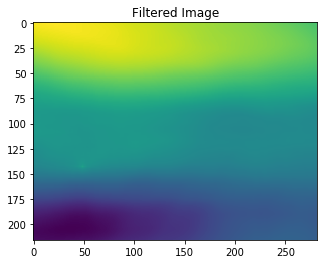

In [34]:
plt.imshow(result)
plt.title('Filtered Image')
plt.show()

In [36]:
from numpy import unravel_index
unravel_index(result.argmax(), result.shape)

(0, 15)

In [38]:
image = Image.open('hills.jpeg')
filter_ = Image.open('template.png')
result = linear_filter(image, filter_)


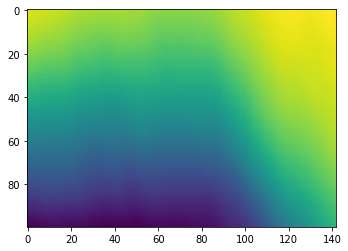

In [39]:
plt.imshow(result)

In [40]:
from numpy import unravel_index
unravel_index(result.argmax(), result.shape)

(0, 137)

# Convolution using filter

In [41]:
def convolution2d(image, kernel):
    """
    Perform convolution on an image using kernal.
    
    Arguements:
    image -- 2d matrix represingting iamge.
    kernal - kernel t apply on image.
    
    returns:
    results - filtered image
    
    """
    
    kernel_new = filter_.transpose(Image.FLIP_TOP_BOTTOM).transpose(Image.FLIP_LEFT_RIGHT)
    result = linear_filter(image, kernel_new)
    return result
    

In [44]:
# To test your implementation, run the below code.
image = Image.open('car_road.jpg')
filter_ = Image.open('car.jpg')
result = convolution2d(image, filter_)

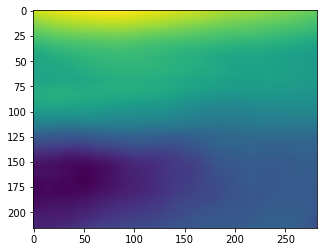

In [45]:
plt.imshow(result)

In [46]:
from numpy import unravel_index
print(unravel_index(result.argmin(), result.shape))
print(unravel_index(result.argmax(), result.shape))

(168, 51)
(0, 71)


# Sobel Filter

In [48]:

import numpy as np
from PIL import Image

image = Image.open('clown.png')

# 3*3 vertical sobel filter
sobel_v = np.array([[1, 0, -1],
                    [2, 0, -2],
                    [1, 0, -1]])

# 3*3 horizontal sobel filter
sobel_h = np.array([[1, 2, 1],
                    [0, 0, 0],
                    [-1, -2, -1]])

In [49]:
# Vertical respon 
response_v = convolution2d(image, sobel_v)

# horizontal response
response_h = convolution2d(image, sobel_h)

# fianl response

G = np.abs(response_h)+ np.abs(response_v)


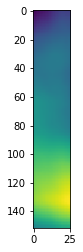

In [50]:
plt.imshow(G)

In [51]:
from numpy import unravel_index
print(unravel_index(G.argmin(), G.shape))
print(unravel_index(G.argmax(), G.shape))

(0, 0)
(132, 25)


In [54]:
###SOLUTION OF Question 6
import numpy as np
from PIL import Image

image = Image.open('clown.png')


# Define 3*3 Laplace filter (Hint: refer lecture slides)
laplacian_filter = np.array([[0, -1, 0],
                             [-1, 4, -1],
                             [0, -1, 0]])


response_L = convolution2d(image, laplacian_filter) 



In [55]:
from numpy import unravel_index
print(unravel_index(response_L.argmin(), response_L.shape))
print(unravel_index(response_L.argmax(), response_L.shape))

(0, 0)
(132, 25)
